In [79]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [54]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

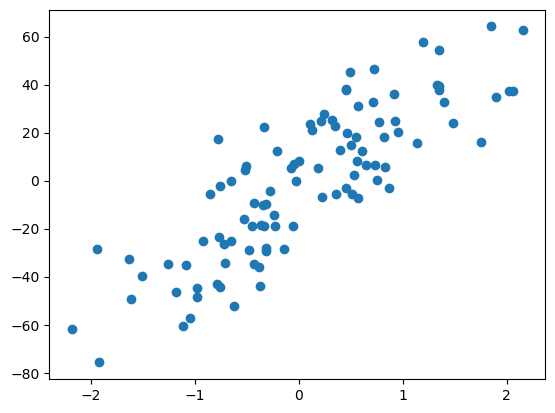

In [55]:
plt.scatter(X, y)
plt.show()

In [56]:
# first, we would train the linear regression model bundled with sklearn
# remember, this implements Ordinary Least Square(ORS), not Gradient Descent
lr_model = LinearRegression()
lr_model.fit(X, y)

LinearRegression()

In [57]:
# coeff is the slope
# intercept is the value of b
lr_model.coef_, lr_model.intercept_

(array([27.82809103]), -2.29474455867698)

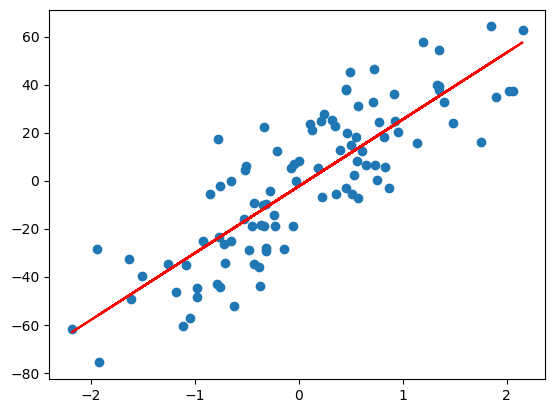

In [61]:
plt.scatter(X, y)
plt.plot(X, lr_model.predict(X), color="red")
plt.show()
# the red line in the graph below shows the best line that minimizes the error function
# we will create a model/class of our own and try to match this 

In [62]:
# now we will make our own Linear Regression class that will implement Gradient Descent

In [72]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self, X, y):
        for _ in range(self.epochs):
            # find the slope wrt to b and m
            loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b) * X.ravel())

            # find the step_size
            step_size_b = self.lr * loss_slope_b
            step_size_m = self.lr * loss_slope_m

            # now change the value of b and m
            self.b -= step_size_b
            self.m -= step_size_m

            # plotting the line for the value of m and b in each iteration
            y_pred = self.b + self.m * X.ravel()
            plt.plot(X, y_pred)
        # plotting the line from the values of b and m, calculated by the sklearn linear regression model
        plt.plot(X, lr_model.predict(X), color='black')
        plt.scatter(X, y)
            
    def predict(self, X):
        return self.b + self.m * X.ravel()

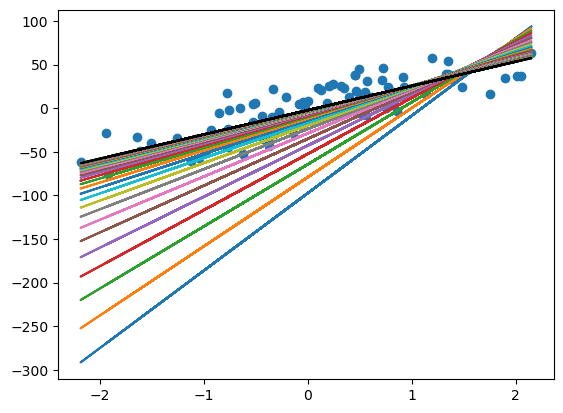

In [73]:
lrgd = LinearRegressionGD(learning_rate=0.001, epochs=100)
lrgd.fit(X, y)

###  The black line in the above graph is the goal for our model. And it appears that our model achieved it. Let's compare the intercept and slope 

In [78]:
print(lrgd.m, lrgd.b)
print(lr_model.coef_, lr_model.intercept_)
# the values of slope and intercept appear to be approximately equal

27.828091872608653 -2.2947448944994893
[27.82809103] -2.29474455867698


In [80]:
r2_score(y, lr_model.predict(X))

0.7035182396294911

In [82]:
r2_score(y, lrgd.predict(X))

0.7035182396294904